Found cached dataset liar (/Users/Alex/.cache/huggingface/datasets/liar/default/1.0.0/479463e757b7991eed50ffa7504d7788d6218631a484442e2098dabbf3b44514)
100%|██████████| 3/3 [00:00<00:00, 272.30it/s]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1283 entries, 0 to 1282
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1283 non-null   object 
 1   label                 1283 non-null   int64  
 2   statement             1283 non-null   object 
 3   subject               1283 non-null   object 
 4   speaker               1283 non-null   object 
 5   job_title             1283 non-null   object 
 6   state_info            1283 non-null   object 
 7   party_affiliation     1283 non-null   object 
 8   barely_true_counts    1283 non-null   float64
 9   false_counts          1283 non-null   float64
 10  half_true_counts      1283 non-null   float64
 11  mostly_true_counts    1283 non-null   float64
 12  pants_on_fire_counts  1283 non-null   float64
 13  context               1283 non-null   object 
dtypes: float64(5), int64(1), object(8)
memory usage: 140.5+ KB
None
        

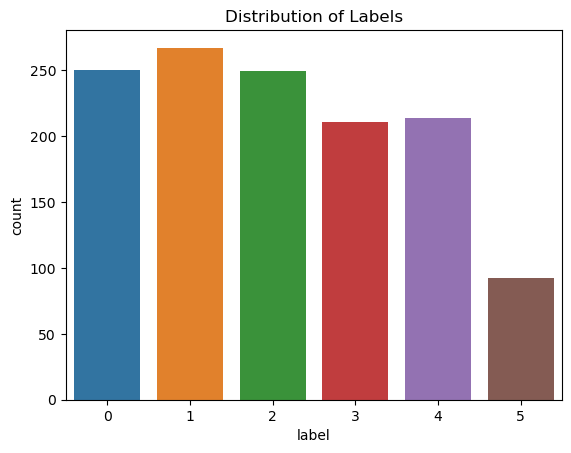

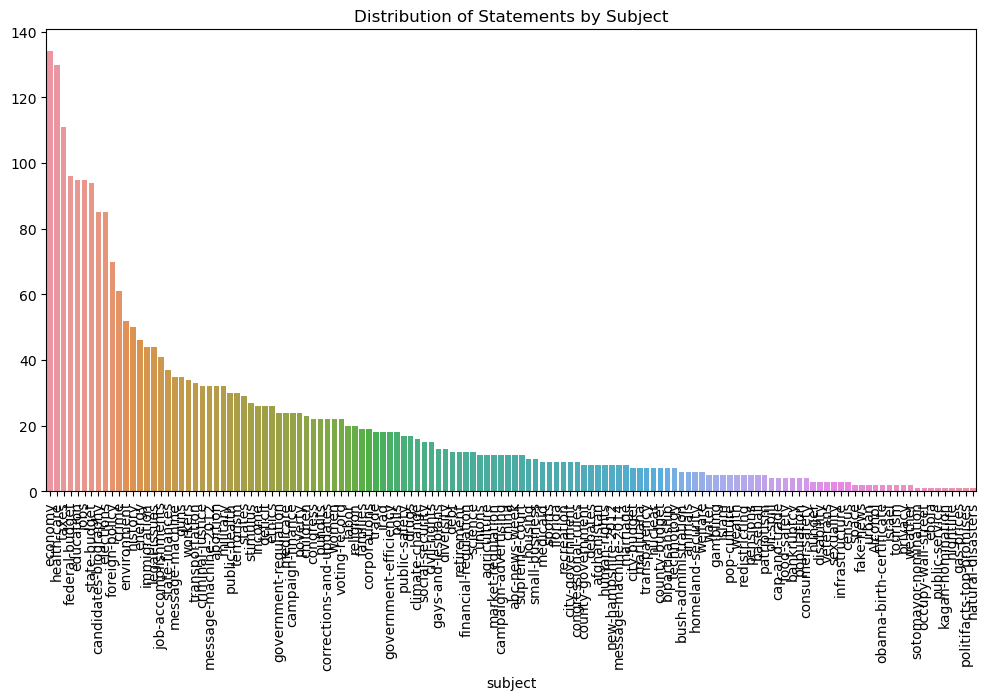

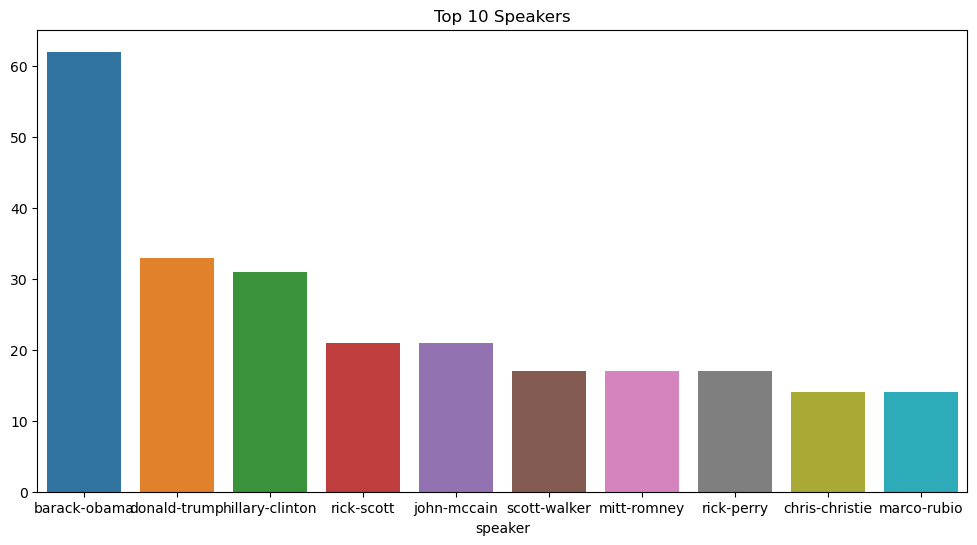

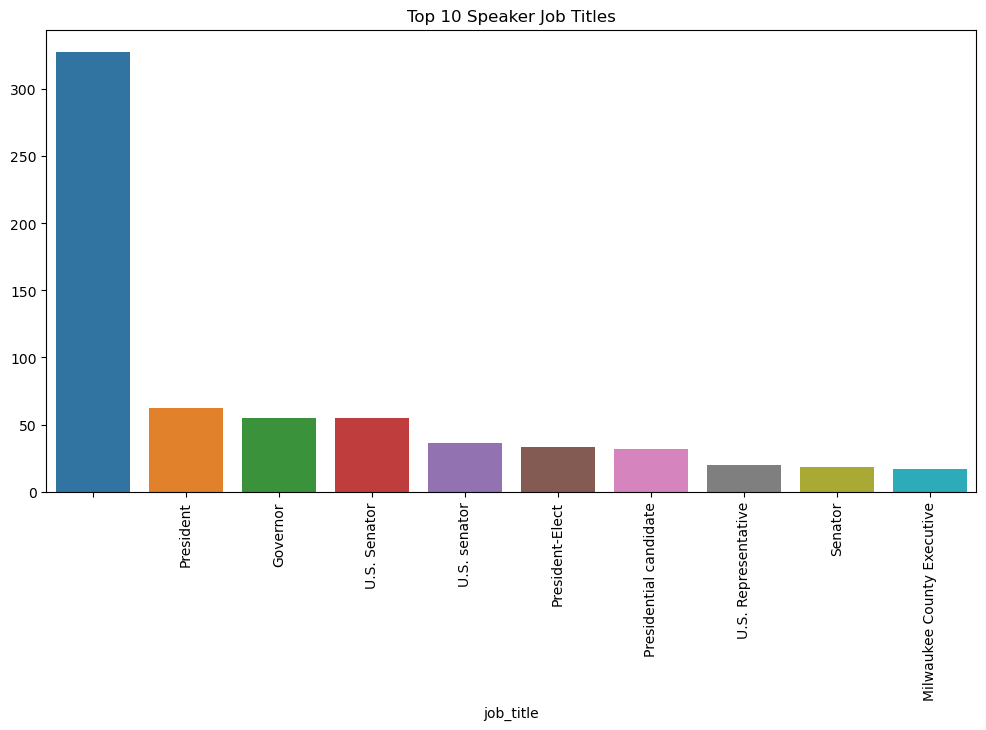

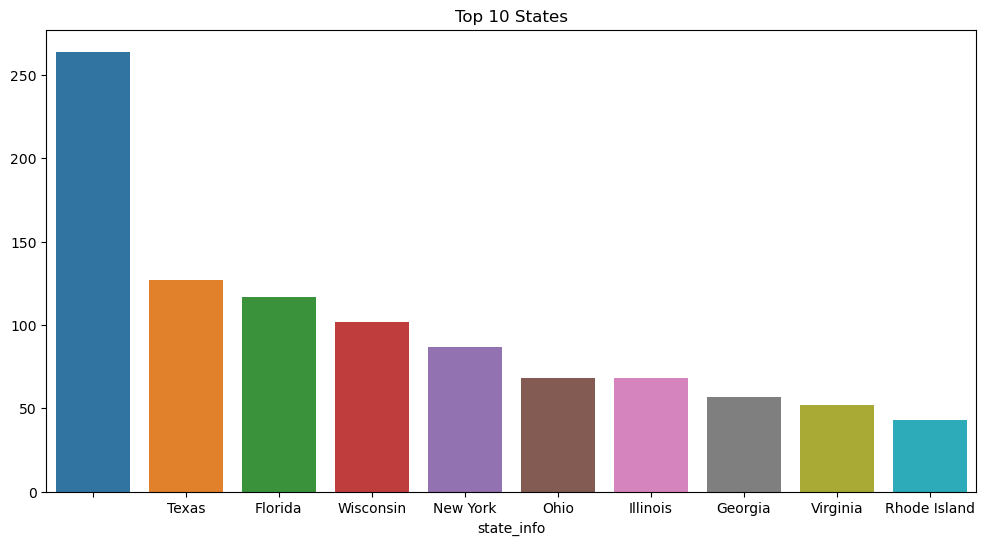

In [3]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns

# Load liar dataset
liar_data = pd.DataFrame(load_dataset("liar")['test'])

# Display basic information about the dataset
print(liar_data.info())
print(liar_data.head())

# Explore the distribution of labels
sns.countplot(x='label', data=liar_data)
plt.title('Distribution of Labels')
plt.show()

# Explore the distribution of statements by subject
subjects = liar_data['subject'].str.split(',').explode()
subjects_count = subjects.value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(x=subjects_count.index, y=subjects_count.values)
plt.xticks(rotation=90)
plt.title('Distribution of Statements by Subject')
plt.show()

# Explore the distribution of statements by speaker
speaker_count = liar_data['speaker'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=speaker_count.index, y=speaker_count.values)
plt.title('Top 10 Speakers')
plt.show()

# Explore the distribution of statements by speaker's job title
job_count = liar_data['job_title'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=job_count.index, y=job_count.values)
plt.xticks(rotation=90)
plt.title('Top 10 Speaker Job Titles')
plt.show()

# Explore the distribution of statements by state
state_count = liar_data['state_info'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=state_count.index, y=state_count.values)
plt.title('Top 10 States')
plt.show()


In [4]:
import pandas as pd
from datasets import load_dataset
import graph_tool.all as gt

# Load liar dataset
liar_data = pd.DataFrame(load_dataset("liar")['test'])

# Create an empty directed graph
G = gt.Graph(directed=True)

# Add nodes to the graph for each speaker
speakers = liar_data['speaker'].unique()
vertex_map = {}
"""for speaker in speakers:
    v = G.add_vertex()
    vertex_map[speaker] = v"""

# Add edges to the graph for each pair of speakers who appear in the same context
contexts = liar_data['context'].unique()
for context in contexts:
    speakers_in_context = liar_data.loc[liar_data['context'] == context]['speaker']
    for speaker1 in speakers_in_context:
        for speaker2 in speakers_in_context:
            if speaker1 != speaker2:
                try:
                    G.add_edge(vertex_map[speaker1], vertex_map[speaker2])
                except:
                    v = G.add_vertex()
                    vertex_map[speaker1] = v
                    v = G.add_vertex()
                    vertex_map[speaker2] = v
                    G.add_edge(vertex_map[speaker1], vertex_map[speaker2])

# Hide vertices
vertex_fill_color = G.new_vertex_property("vector<double>")
vertex_fill_color.set_value([1, 1, 1, 0]) # Set vertex fill color to transparent

# Output only the edges of the graph
for e in G.edges():
    print(f"{e.source()} -> {e.target()}")

# Visualize the graph
#pos = gt.sfdp_layout(G)
pos = gt.sfdp_layout(G, K=0.5)
gt.graph_draw(G, pos=pos, output_size=(800, 800), vertex_fill_color=vertex_fill_color, output="graph.png")


Found cached dataset liar (/Users/Alex/.cache/huggingface/datasets/liar/default/1.0.0/479463e757b7991eed50ffa7504d7788d6218631a484442e2098dabbf3b44514)
100%|██████████| 3/3 [00:00<00:00, 207.52it/s]


0 -> 1
1 -> 20
1 -> 3
1 -> 5
1 -> 3
1 -> 7
1 -> 9
1 -> 11
1 -> 13
1 -> 15
1 -> 17
1 -> 5
1 -> 19
1 -> 5
1 -> 21
1 -> 5
1 -> 20
1 -> 3
1 -> 5
1 -> 3
1 -> 7
1 -> 9
1 -> 11
1 -> 13
1 -> 15
1 -> 17
1 -> 5
1 -> 19
1 -> 5
1 -> 21
1 -> 5
2 -> 3
3 -> 20
3 -> 1
3 -> 5
3 -> 1
3 -> 7
3 -> 9
3 -> 11
3 -> 13
3 -> 15
3 -> 17
3 -> 5
3 -> 19
3 -> 5
3 -> 21
3 -> 5
3 -> 20
3 -> 1
3 -> 5
3 -> 1
3 -> 7
3 -> 9
3 -> 11
3 -> 13
3 -> 15
3 -> 17
3 -> 5
3 -> 19
3 -> 5
3 -> 21
3 -> 5
4 -> 5
4 -> 1
4 -> 3
5 -> 20
5 -> 1
5 -> 3
5 -> 1
5 -> 3
5 -> 7
5 -> 9
5 -> 11
5 -> 13
5 -> 15
5 -> 17
5 -> 19
5 -> 21
5 -> 20
5 -> 1
5 -> 3
5 -> 1
5 -> 3
5 -> 7
5 -> 9
5 -> 11
5 -> 13
5 -> 15
5 -> 17
5 -> 19
5 -> 21
5 -> 20
5 -> 1
5 -> 3
5 -> 1
5 -> 3
5 -> 7
5 -> 9
5 -> 11
5 -> 13
5 -> 15
5 -> 17
5 -> 19
5 -> 21
5 -> 20
5 -> 1
5 -> 3
5 -> 1
5 -> 3
5 -> 7
5 -> 9
5 -> 11
5 -> 13
5 -> 15
5 -> 17
5 -> 19
5 -> 21
5 -> 234
5 -> 231
5 -> 233
5 -> 101
5 -> 77
5 -> 101
5 -> 39
5 -> 235
5 -> 482
5 -> 482
5 -> 67
5 -> 481
5 -> 133
5 -> 483
5 

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7ff35ae65ba0, at 0x7ff359edfe50>